# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В данном файле содержится информация о 23699 объектах, однако в некоторых столбцах есть пропуски, которые нужно будет заполнить. Также нужно поменять формат данных у некоторых столбцов. 

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

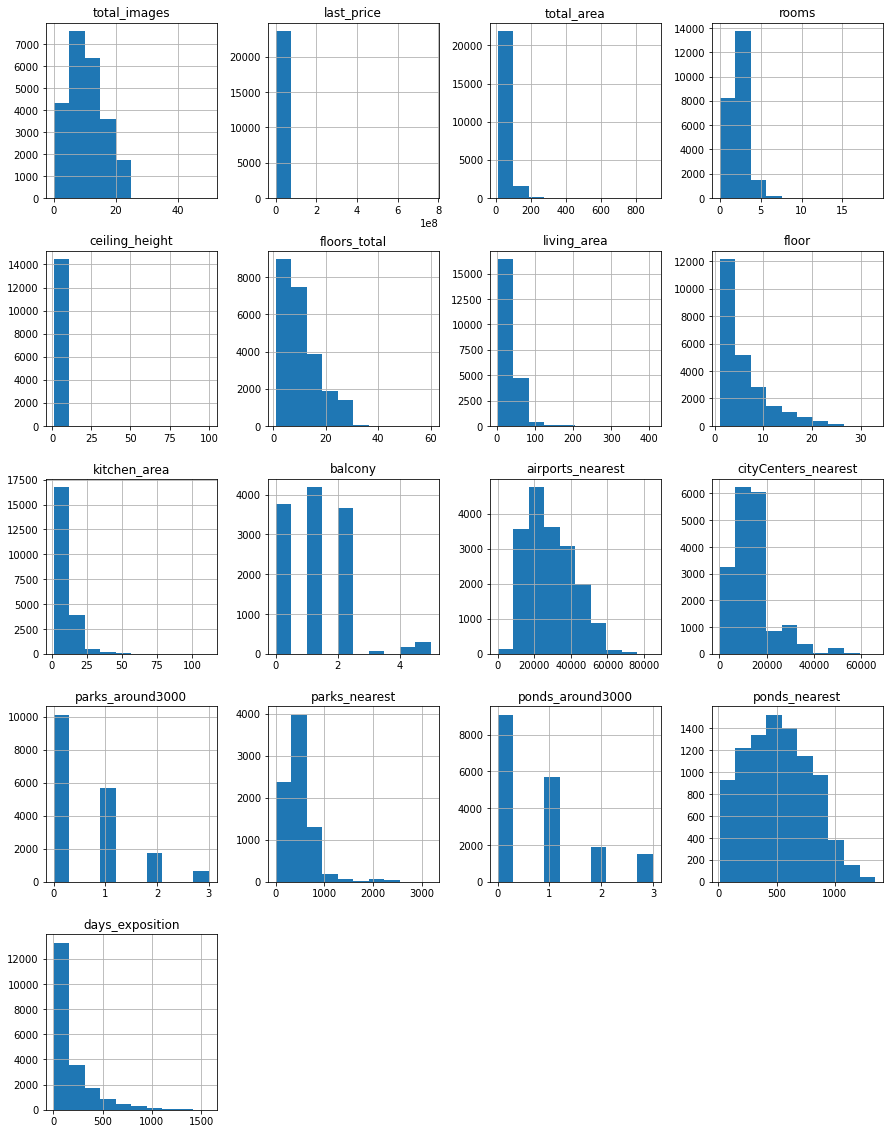

In [4]:
data.hist(figsize=(15, 20))

### Предобработка данных

In [5]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,10), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

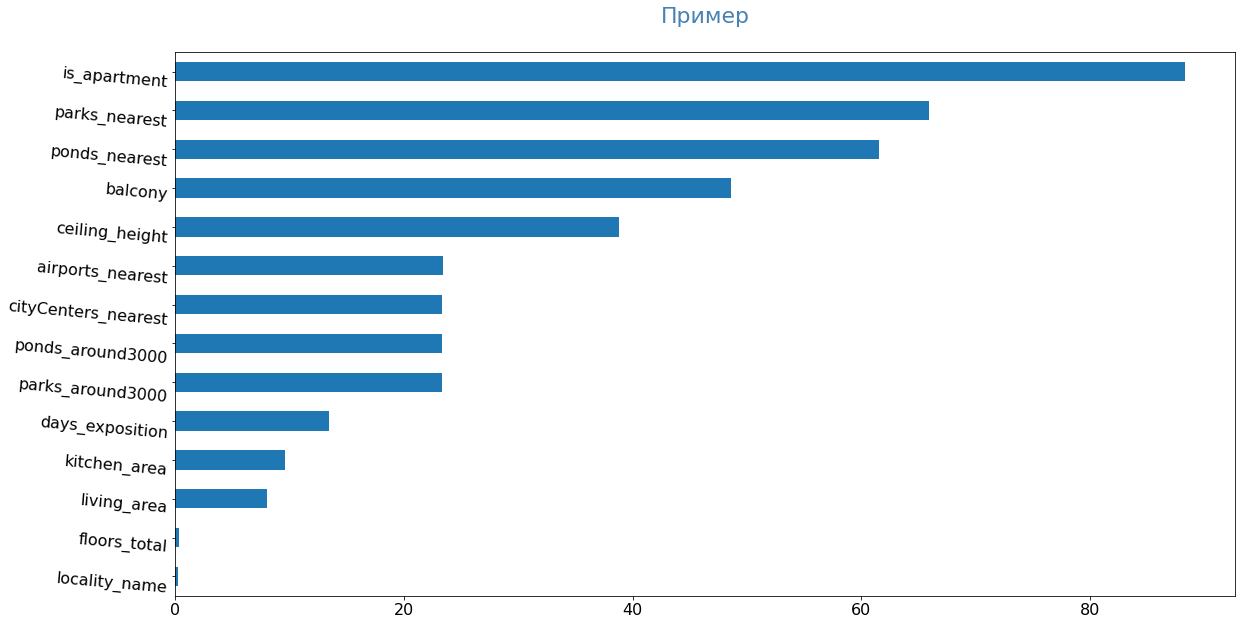

In [6]:
pass_value_barh(data)

In [7]:
#создаем функцию, которая считает количество пропусков
def nan(column):
    n = data[column].isna().value_counts()[1] / len(data)
    return f"{n:.2%}"

#создаем функцию, которая считает количество заполненных ячеек
def full(column):
    f = data[column].isna().value_counts()[0] / len(data)
    return f"{f:.2%}"

In [8]:
#количество пропусков в balcony
nan('balcony')

'48.61%'

In [9]:
data['balcony'].fillna(0, inplace=True)

Балконов в квартире нет, поэтому заменяем на 0.

In [10]:
full('balcony')

'100.00%'

С этим столбцом закончили.

In [11]:
#количество пропусков в ceiling_height
nan('ceiling_height')

'38.80%'

<AxesSubplot:ylabel='Frequency'>

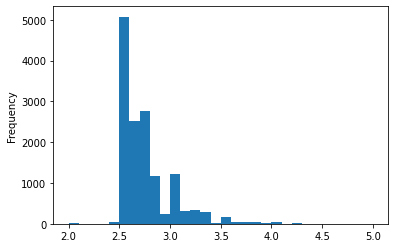

In [12]:
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5))

In [13]:
data['ceiling_height'].value_counts()

2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

In [14]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [15]:
data[data['ceiling_height'] > 4].sort_values('ceiling_height').tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17857,1,3900000.0,56.0,2017-12-22T00:00:00,3,27.0,5.0,33.0,4,False,...,NaN,0.0,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0
21377,19,4900000.0,42.0,2017-04-18T00:00:00,1,27.5,24.0,37.7,19,False,...,11.0,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
22336,19,9999000.0,92.4,2019-04-05T00:00:00,2,32.0,6.0,55.5,5,False,...,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,0.0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


Есть слишком большие значения, но к счастью, их мало.

In [16]:
data.query('ceiling_height > 4 and ceiling_height <= 25')['ceiling_height'].count()

62

In [17]:
data.drop(index=data.query('ceiling_height > 4 and ceiling_height < 25').index, inplace=True)

Удаляем квартиры с потолками от 4 метров до 25, так как данных значений немного и чем их заменить непонятно. 

In [18]:
data.query('ceiling_height >= 25 and ceiling_height <= 50')['ceiling_height'].count()

19

In [19]:
data.update(data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 50)]['ceiling_height']/10)

Квартиры с высотой от 25 до 50 метров просто делим на 10, предполагая опечатку.  

In [20]:
data.query('ceiling_height >= 50')['ceiling_height'].count()

1

In [21]:
data.drop(index=data.query('ceiling_height > 50').index, inplace=True)

Вряд  ли квартира с высотой потолков больше 50 метров существует, да и она одна. Смело удаляем.

In [22]:
data.query('ceiling_height < 2.5')['ceiling_height'].count()

73

In [23]:
data.drop(index=data.query('ceiling_height < 2.5').index, inplace=True)

Если верить potolok-exp.ru, то таких низких квартир не существует, поэтому смело удаляем, так как значений немного. 

In [24]:
data.loc[(data.ceiling_height.isna()), 'ceiling_height']= data['ceiling_height'].median()

In [25]:
#количество заполненных ячеек в ceiling_height
full('ceiling_height')

'100.00%'

Заполнили пропуски в высоте потолков медианой, убедились, что их не осталось. 

In [26]:
#количество пропусков в floors_total
nan('floors_total')

'0.36%'

In [27]:
data.dropna(subset=['floors_total'], inplace=True)

Пустые значения просто удаляем, их процент небольшой.

In [28]:
#количество пропусков в living_area
nan('living_area')

'7.91%'

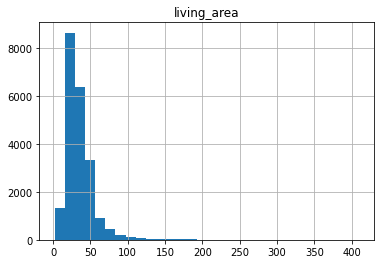

In [29]:
data.hist('living_area', bins=30);

In [30]:
data.query('living_area < 14')['living_area'].count()

315

In [31]:
data.drop(index=data.query('living_area < 14').index,inplace=True)

Федеральными документами установлена минимальная площадь жилой комнаты для однокомнатной квартиры в размере 14 кв. м. От этих квартир придется избавиться.

In [32]:
data['area_ratio'] = data['living_area'] / data['total_area']
median_area = data['area_ratio'].describe()[4]
median_area

0.5

In [33]:
data.loc[(data.living_area.isna()), 'living_area']= round(data['total_area']* median_area, 1)

In [34]:
full('living_area')

'100.00%'

Посчитали зависимость жилой площади от общей и по ней вычислили жилую площадь для пропусков. 
Сделаем всё тоже самое для площади кухни.

In [35]:
nan('kitchen_area')

'9.40%'

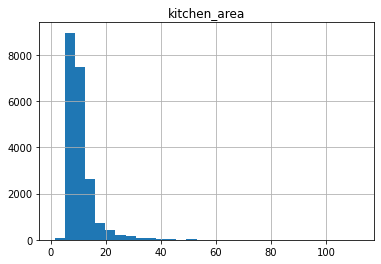

In [36]:
data.hist('kitchen_area', bins=30);

In [37]:
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area']
median_kitchen = data['kitchen_ratio'].median()
median_kitchen

0.17142857142857143

In [38]:
data.loc[(data.kitchen_area.isna()), 'kitchen_area']= round(data['total_area'] * median_kitchen)

In [39]:
data.loc[(data.kitchen_area < 4), 'kitchen_area']= 4

In [40]:
full('kitchen_area')

'100.00%'

In [41]:
control = data['total_area']*0.95 <= (data['living_area'] + data['kitchen_area'])
control[control== True].count()

309

С кухнями закончили!

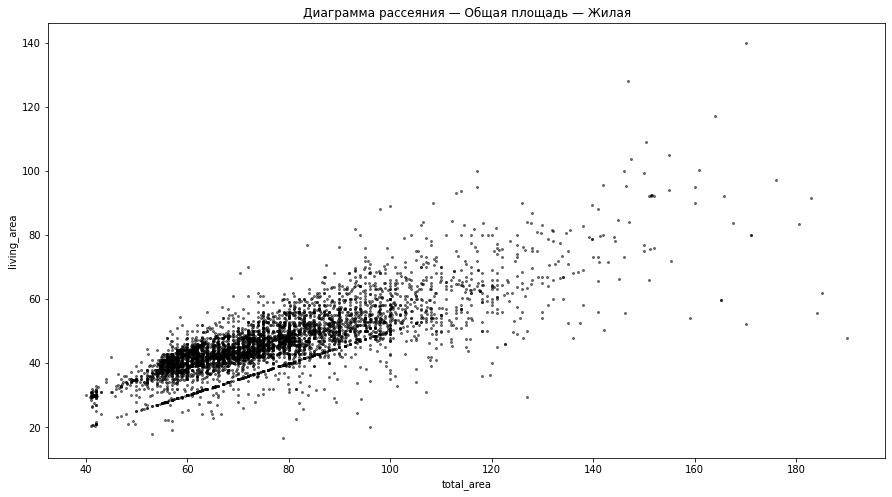

In [42]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'black', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');

In [43]:
data['kitchen_area'].describe()

count    23169.000000
mean        10.451287
std          5.974256
min          4.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [44]:
nan('locality_name')

'0.20%'

Пропуски в населенных пунктах. Поскольку их процент небольшой, то просто удаляем.

In [45]:
data.dropna(subset=['locality_name'], inplace=True)

In [46]:
full('locality_name')

'100.00%'

С населенными пунктами закончили!

In [47]:
nan('cityCenters_nearest')

'23.25%'

К сожалению, с этими пропусками мы вряд ли можем что-то сделать. Но эти пропуски скорее всего технические, так как обычно рассчитывается расстояние автоматически по указанному адресу. 

In [48]:
nan('is_apartment')

'88.27%'

И здесь непонятно, как данные пропуски заполнять. 

In [49]:
nan('airports_nearest')

'23.33%'

Аналогично.

In [50]:
nan('parks_around3000')

'23.24%'

In [51]:
nan('parks_nearest')

'65.92%'

In [52]:
nan('ponds_around3000')

'23.24%'

In [53]:
nan('ponds_nearest')

'61.73%'

Пропуски здесь заменим медианой, поскольку количество пропусков не так велико.

In [54]:
nan('days_exposition')

'13.51%'

In [55]:
#data.loc[data['days_exposition'].isna(), 'days_exposition'] = data['days_exposition'].median()

In [56]:
full('days_exposition')

'86.49%'

Изменим тип данных у столбца first_day_exposition. 

In [57]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.first_day_exposition.dtype

dtype('<M8[ns]')

In [58]:
# check
data.locality_name.nunique()

361

In [59]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'посёлок Парголово', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'Сланцы', 'село Путилово', 'Ивангород',
    

In [60]:
def locality_name(row):
    if 'Янино-1' in row:
        return 'городской поселок Янино-1'
    elif 'Мурино' in row:
        return 'поселок Мурино'
    elif 'Кудрово' in row:
        return 'деревня Кудрово'
    elif 'Красный Бор' in row:
        return 'поселок городского типа Красный Бор'
    elif 'Фёдоровское' in row:
        return 'Федоровское'
    elif 'Лебяжье' in row:
        return 'поселок городского типа Лебяжье'
    elif 'Кузьмоловский' in row:
        return 'поселок городского типа Кузьмоловский'
    elif 'Аннино' in row:
        return 'поселок Аннино'
    elif 'Новый Свет' in row:
        return 'поселок Новый Свет'
    elif 'Никольское' in row:
        return 'село Никольское'
    elif 'Бугры' in row:
        return 'поселок Бугры'
    elif 'Рощино' in row:
        return 'поселок городского типа Рощино'
    elif 'Лесогорский' in row:
        return 'поселок городского типа Лесогорский'
    elif 'Петровское' in row:
        return 'поселок Петровское'
    elif 'Щеглово' in row:
        return 'поселок Щеглово'
    elif 'Мичуринское' in row:
        return 'поселок Мичуринское'
    elif 'Вещево' in row:
        return 'поселок при железнодорожной станции Вещево'
    elif 'Токсово' in row:
        return 'поселок городского типа Токсово'
    elif 'Старая Малукса' in row:
        return 'поселок Старая Малукса'
    elif 'Калитино' in row:
        return 'поселок Калитино'
    elif 'Приладожский' in row:
        return 'поселок городского типа Приладожский'
    elif 'Пансионат Зелёный Бор' in row:
        return 'поселок Пансионат Зелёный Бор'
    elif 'Рабитицы' in row:
        return 'поселок Рабитицы'
    elif 'Лесное' in row:
        return 'поселок Лесное'
    elif 'Павлово' in row:
        return 'село Павлово'
    elif 'Победа' in row:
        return 'поселок Победа'
    elif 'Терволово' in row:
        return 'село Терволово'
    elif 'Советский' in row:
        return 'поселок Советский'
    elif 'Вырица' in row:
        return 'поселок Вырица'
    elif 'Тельмана' in row:
        return 'поселок Тельмана'
    elif 'Большая Ижора' in row:
        return 'поселок городского типа Большая Ижора'
    elif 'Рахья' in row:
        return 'поселок Рахья'
    elif 'Зимитицы' in row:
        return 'поселок Зимитицы'
    elif 'Свердлова' in row:
        return 'поселок Свердлова'
    elif 'Рябово' in row:
        return 'село Рябово'
    elif 'Поляны' in row:
        return 'поселок Поляны'
    elif 'Мга' in row:
        return 'поселок Мга'
    elif 'Ильичёво' in row:
        return 'село Ильичево'
    elif 'Гаврилово' in row:
        return 'село Гаврилово'
    elif 'Назия' in row:
        return 'поселок Назия'
    elif 'Гарболово' in row:
        return 'село Гарболово'
    elif 'Приветнинское' in row:
        return 'село Приветнинское'
    elif 'Мельниково' in row:
        return 'село Мельниково'
    elif 'Усть-Луга' in row:
        return 'поселок Усть-Луга'
    elif 'Любань' in row:
        return 'Любань'
    elif 'Стеклянный' in row:
        return 'поселок Стеклянный'
    elif 'Форносово' in row:
        return 'поселок городского типа Форносово'
    elif 'Сумино' in row:
        return 'поселок Сумино'
    elif 'Возрождение' in row:
        return 'поселок Возрождение'
    elif 'Лисий Нос' in row:
        return 'поселок Лисий Нос'
    elif 'Жилгородок' in row:
        return 'поселок Жилгородок'
    elif 'Громово' in row:
        return 'поселок Громово'
    elif 'Коробицыно' in row:
        return 'поселок Коробицыно'
    elif 'Кобралово' in row:
        return 'поселок Кобралово'
    elif 'Перово' in row:
        return 'поселок Перово'
    else:
        return row

In [61]:
data['locality_name'] = data['locality_name'].apply(locality_name)

In [62]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской поселок Янино-1',
       'поселок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'посёлок Парголово', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'посёлок Металлострой', 'поселок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'Сланцы', 'село Путилово', 'Ивангород',
       'Шлиссельбург', 'село Никольск

In [63]:
# check
data.locality_name.nunique()

302

In [64]:
data.duplicated().sum()

0

#### check gap

In [65]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23122 entries, 0 to 23697
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23122 non-null  int64         
 1   last_price            23122 non-null  float64       
 2   total_area            23122 non-null  float64       
 3   first_day_exposition  23122 non-null  datetime64[ns]
 4   rooms                 23122 non-null  int64         
 5   ceiling_height        23122 non-null  float64       
 6   floors_total          23122 non-null  float64       
 7   living_area           23122 non-null  float64       
 8   floor                 23122 non-null  int64         
 9   is_apartment          2712 non-null   object        
 10  studio                23122 non-null  bool          
 11  open_plan             23122 non-null  bool          
 12  kitchen_area          23122 non-null  float64       
 13  balcony         

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
стоит сменить тип данных в 
        
         6   floors_total             23122 non-null  float64       

         13  balcony                  23122 non-null  float64      
 

In [66]:
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')

In [67]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'mean', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,122.00","23,122.00","23,122.00","19,999.00","23,122.00","23,122.00","23,122.00","23,122.00","23,122.00"
min,0.00,13.00,2.50,1.00,"12,190.00",6.50,4.00,1.00,1.00
max,19.00,900.00,4.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00
mean,2.08,60.52,2.69,180.90,"6,533,449.52",34.44,10.45,5.87,10.66
median,2.00,52.11,2.65,95.00,"4,650,000.00",30.00,9.00,4.00,9.00


#### check nan

In [68]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23122 entries, 0 to 23697
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23122 non-null  int64         
 1   last_price            23122 non-null  float64       
 2   total_area            23122 non-null  float64       
 3   first_day_exposition  23122 non-null  datetime64[ns]
 4   rooms                 23122 non-null  int64         
 5   ceiling_height        23122 non-null  float64       
 6   floors_total          23122 non-null  int64         
 7   living_area           23122 non-null  float64       
 8   floor                 23122 non-null  int64         
 9   is_apartment          2712 non-null   object        
 10  studio                23122 non-null  bool          
 11  open_plan             23122 non-null  bool          
 12  kitchen_area          23122 non-null  float64       
 13  balcony         

In [69]:
data = data.loc[(data['rooms'] >= 1) & (data['rooms'] < 7) ]
data = data.loc[(data['total_area'] <= 300) & (data['total_area'] >= 15) ]
data = data.loc[((data['days_exposition'] <= 1200) & (data['days_exposition'] >= 3)) | (data['days_exposition'].isna())]
data = data.loc[((data['last_price'] <= 30000000) & (data['last_price'] >= 100000)) | (data['last_price'].isna())]
data = data.loc[data['floors_total'] <= 25]

In [70]:
# check
data.shape[0]

22168

In [71]:
# check

try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [72]:
# check
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


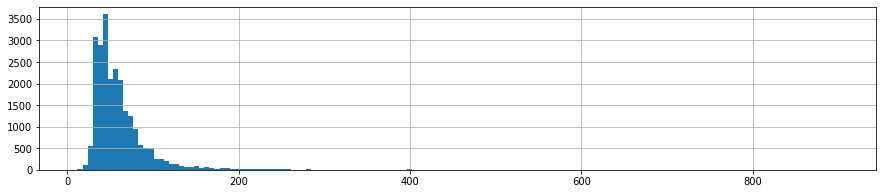

In [73]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3));

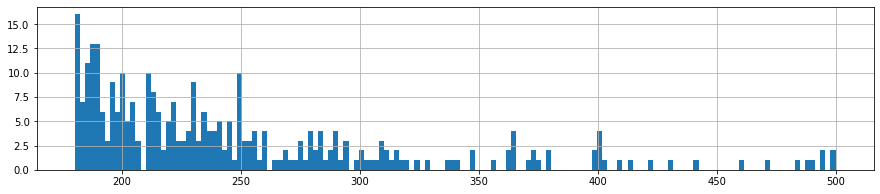

In [74]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

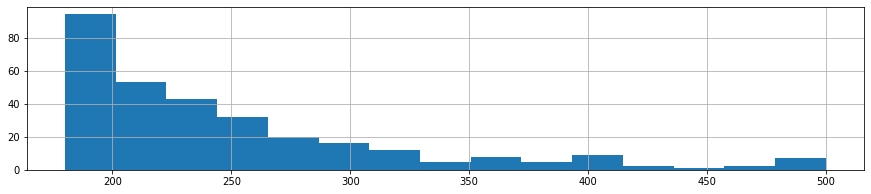

In [75]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

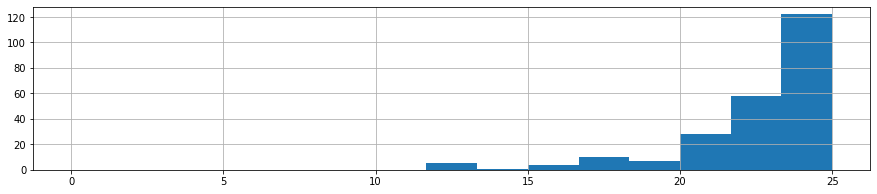

In [76]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [77]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,1.00,21.96,2.50,3.00,"563,002.00",12.50,4.00,1.00,2.00
0.01,1.00,28.00,2.50,4.00,"1,000,000.00",14.38,5.00,1.00,2.00
0.5,2.00,52.00,2.65,94.00,"4,628,270.00",30.00,9.00,4.00,9.00
0.99,5.00,158.00,3.50,982.04,"22,993,300.00",95.00,31.00,22.00,25.00
0.9988,6.00,220.80,4.00,"1,164.00","29,000,000.00",142.00,46.00,25.00,25.00


In [78]:
# check

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,168.00","22,168.00","22,168.00","19,197.00","22,168.00","22,168.00","22,168.00","22,168.00","22,168.00"
min,1.00,15.00,2.50,3.00,"430,000.00",7.50,4.00,1.00,1.00
max,6.00,290.00,4.00,"1,200.00","30,000,000.00",200.00,100.70,25.00,25.00


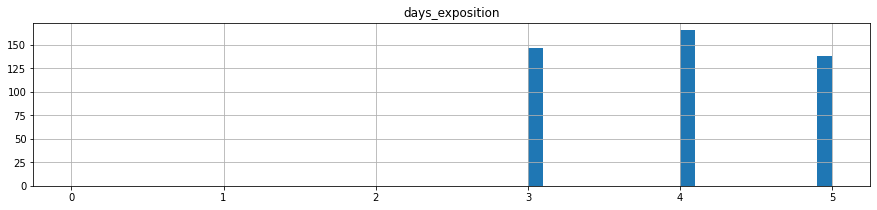

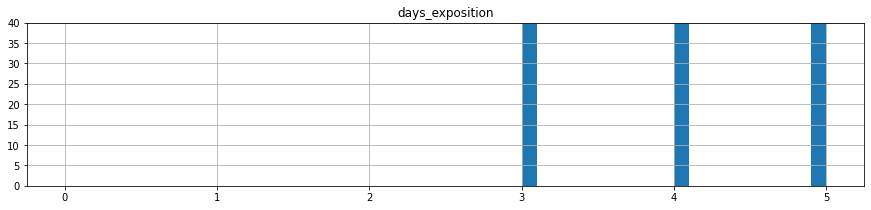

In [79]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

### Посчитайте и добавьте в таблицу новые столбцы

Добавляем столбец с ценой одного квадратного метра

In [80]:
data['price_sqm'] = round(data['last_price'] / data['total_area'])

День недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [81]:
data['day_week'] = data['first_day_exposition'].dt.dayofweek

Месяц публикации объявления

In [82]:
data['month'] = data['first_day_exposition'].dt.month

Год публикации объявления

In [83]:
data['year'] = data['first_day_exposition'].dt.year

Тип этажа квартиры (значения — «‎первый», «последний», «другой»)

In [84]:
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'
data.loc[data['floor'] == 1, 'floor_category'] = 'первый'
data.loc[data['floor_category'].isna(), 'floor_category'] = 'другой'

Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)

In [85]:
data['city_centers_nearest_km'] = round(data['cityCenters_nearest'] / 1000)

### Проведите исследовательский анализ данных

Изучите следующие параметры объектов:

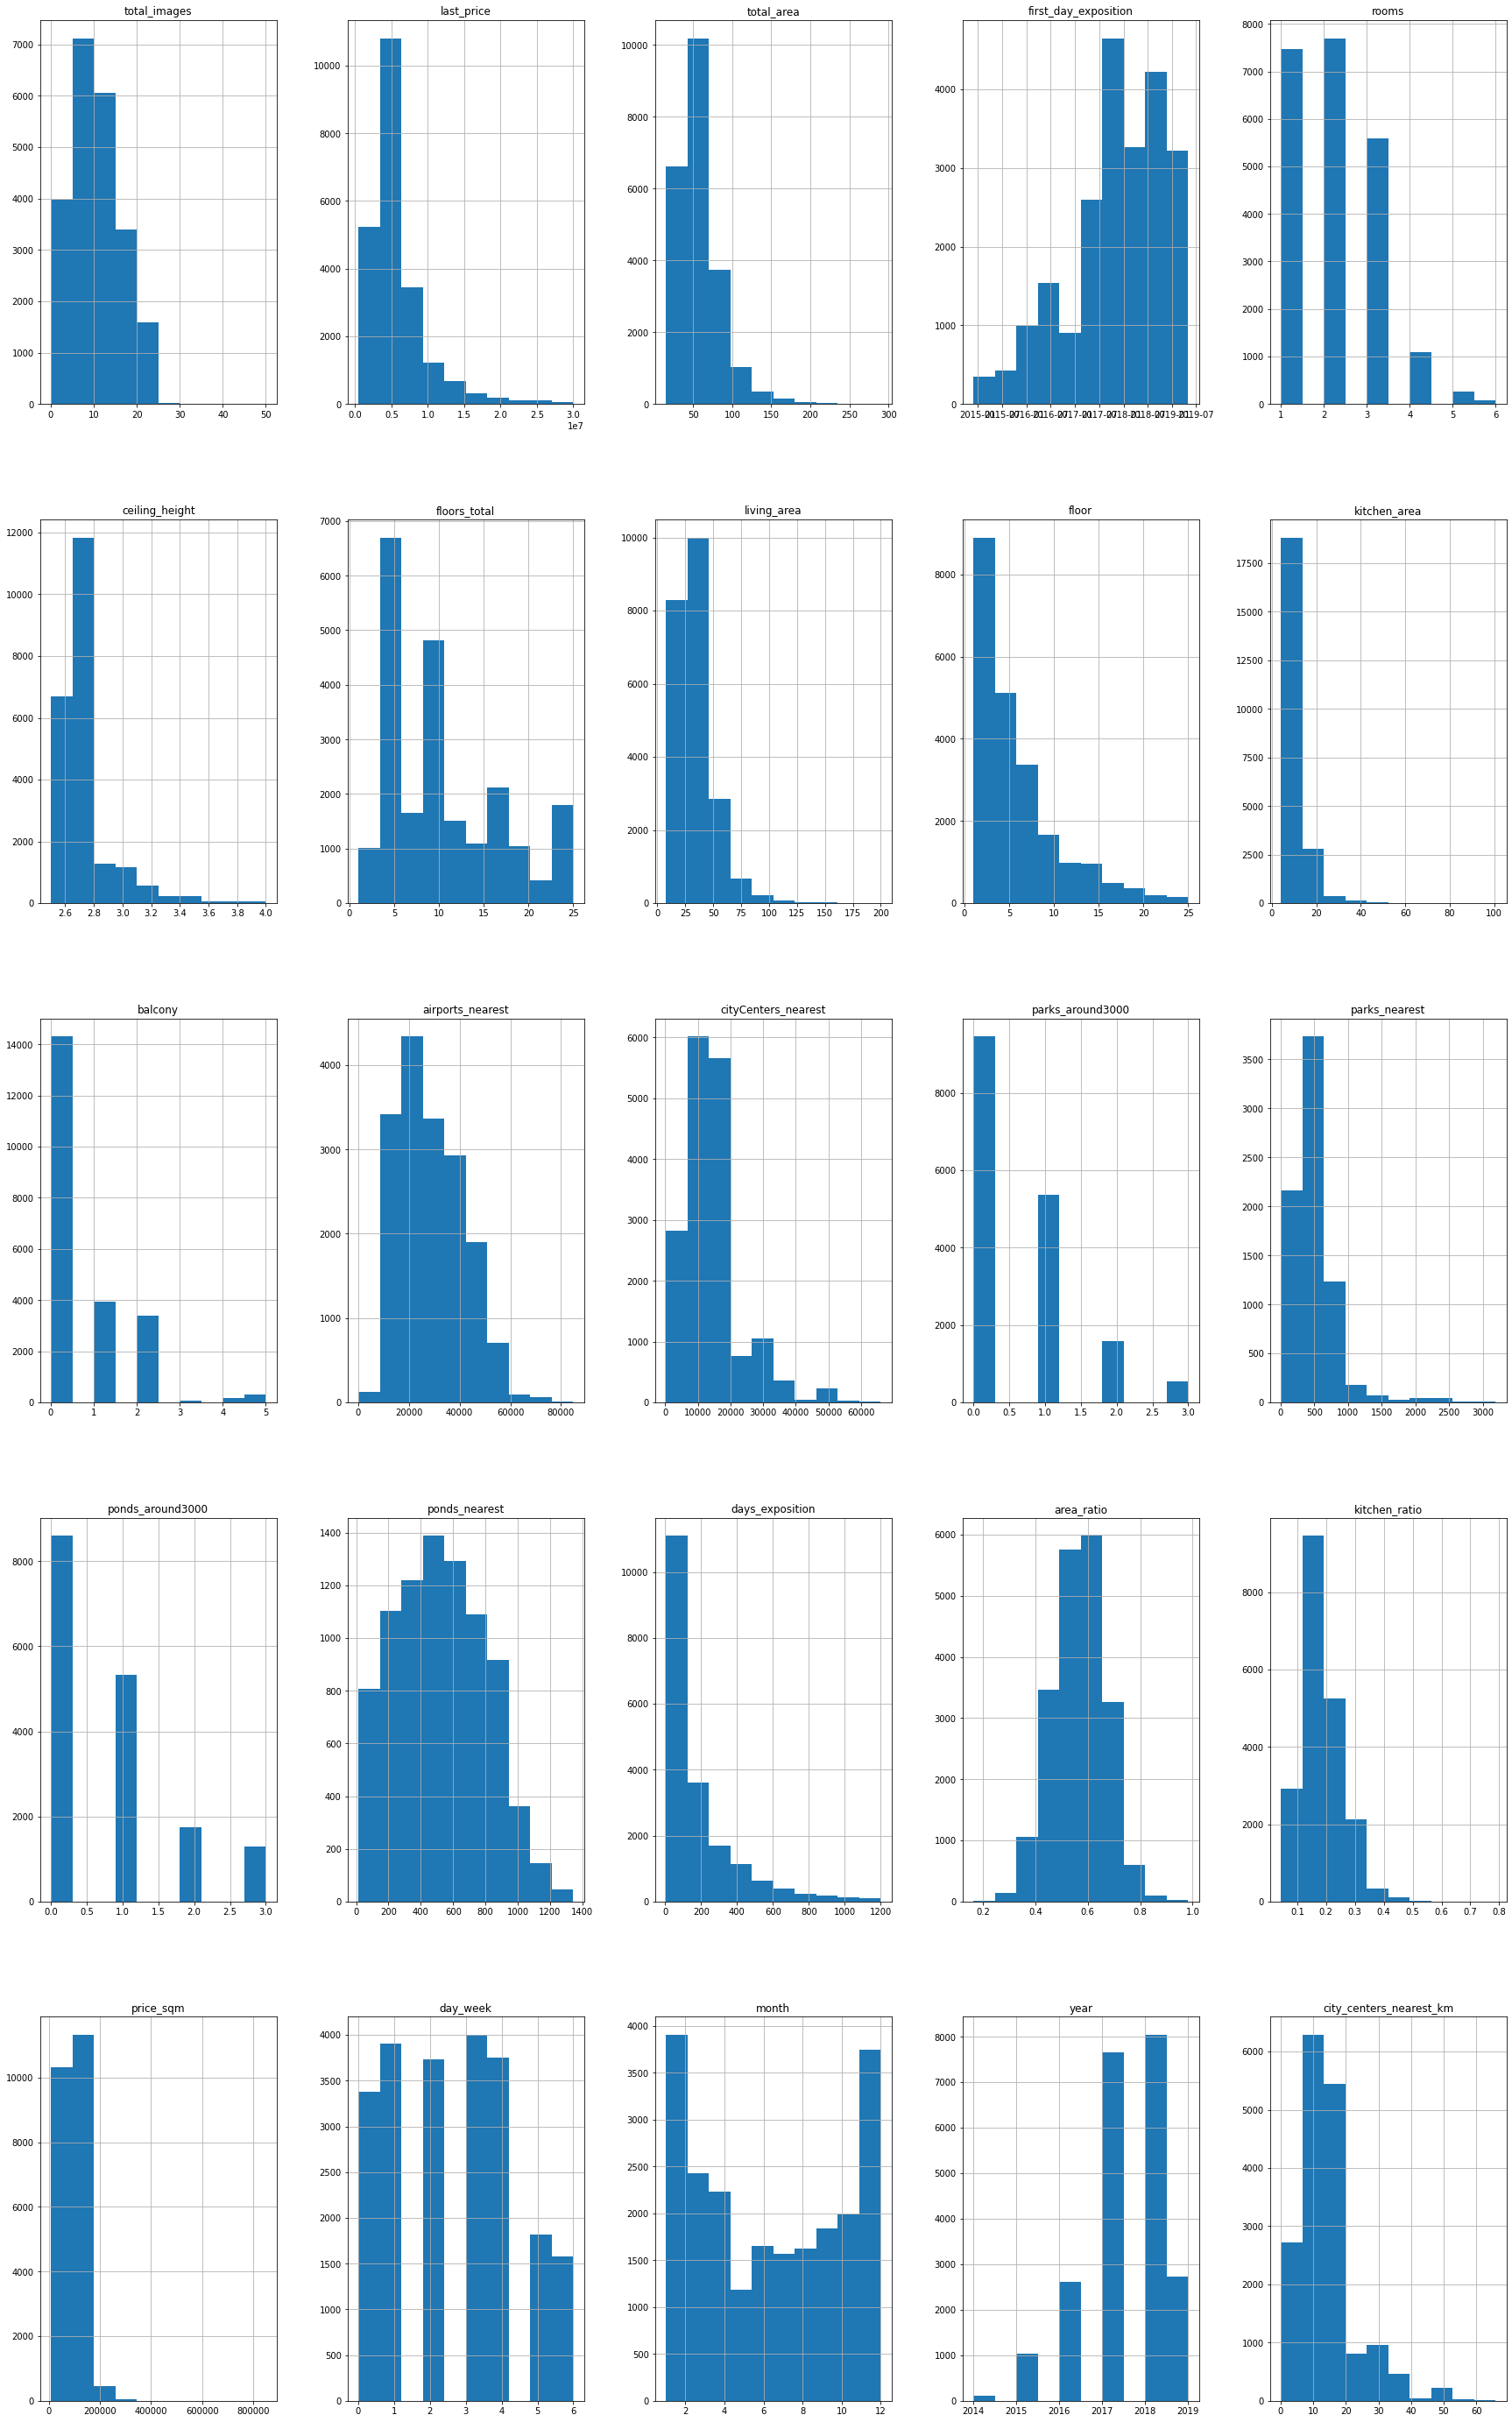

In [86]:
data.hist(figsize=(30, 50));

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

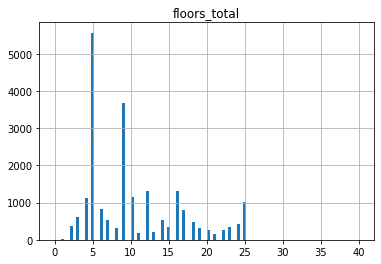

In [87]:
data.hist('floors_total', bins=100, range = (0,40))

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

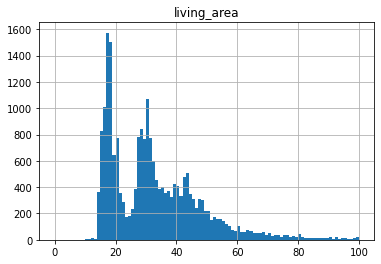

In [88]:
data.hist('living_area', bins=100, range = (0,100))

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

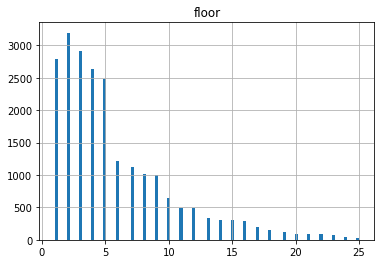

In [89]:
data.hist('floor', bins=100, range = (1,25))

array([[<AxesSubplot:title={'center':'month'}>]], dtype=object)

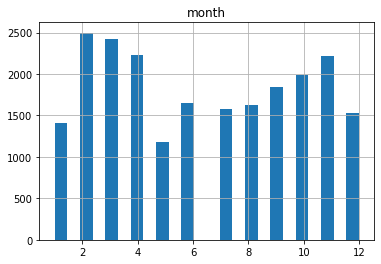

In [90]:
data.hist('month', bins=24, range=(1,12))

In [91]:
print('Общая площадь квартиры в среднем составляет', round(data['total_area'].describe()[5]), 'кв. м.')

Общая площадь квартиры в среднем составляет 52 кв. м.


In [92]:
print('Жилая площадь квартиры в среднем составляет', round(data['living_area'].describe()[5]), 'кв. м.')

Жилая площадь квартиры в среднем составляет 30 кв. м.


In [93]:
print('Площадь кухни в среднем составляет', round(data['kitchen_area'].describe()[5]), 'кв. м.')

Площадь кухни в среднем составляет 9 кв. м.


In [94]:
print('Количество комнат в квартире в среднем составляет', round(data['rooms'].describe()[5]))

Количество комнат в квартире в среднем составляет 2


In [95]:
print('Цена квартиры в среднем составляет', round(data['last_price'].describe()[5]), 'рублей')

Цена квартиры в среднем составляет 4628270 рублей


Больше всего квартир на "другом" этаже. 
Больше всего квартир с парком и прудом на расстоянии до 1км и это хорошо!
Меньше всего публикаций в субботу и воскресенье.

Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 

Среднее время продажи квартиры в днях: 175
Медианное время продажи квартиры в днях: 94


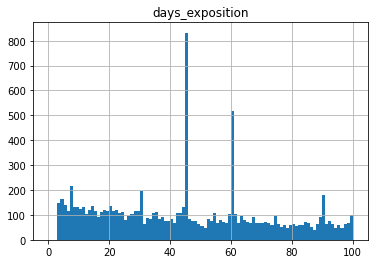

In [96]:
data.hist('days_exposition', bins=100, range = (0,100))
print('Среднее время продажи квартиры в днях:', round(data['days_exposition'].mean()))
print('Медианное время продажи квартиры в днях:', round(data['days_exposition'].median()))

In [97]:
data['days_exposition'].describe()

count    19197.000000
mean       175.341251
std        206.243712
min          3.000000
25%         45.000000
50%         94.000000
75%        227.000000
max       1200.000000
Name: days_exposition, dtype: float64

Если взять медиану, то в среднем квартиры продаются за 90 дней, хотя мы и видим, что среднее почти в 2 раза больше из-за квартир, которые продаются очень долго (до 800 дней). Если удалось продать квартиру раньше 43 дней, то это быстрая продажа. Если же квартира продается дольше 207 дней, можно считать длительной. 

<AxesSubplot:title={'center':'Изменение средней скорости продаж по годам'}, xlabel='year'>

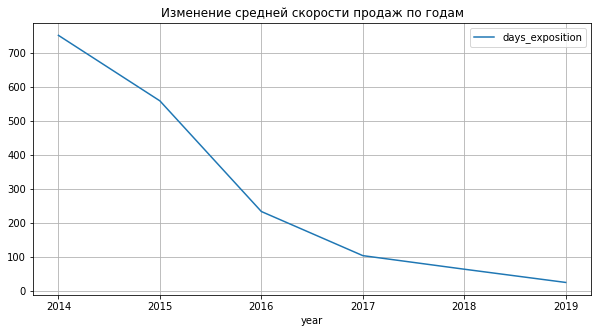

In [98]:
(
    data.pivot_table(index='year', values='days_exposition', aggfunc='median')
    .plot(grid=True, figsize=(10, 5), kind='line', title='Изменение средней скорости продаж по годам')
)

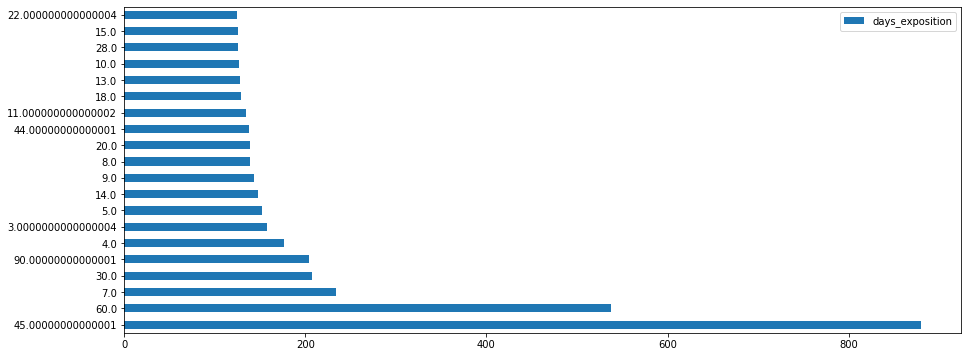

In [99]:
# check
# Моды на реальных данных

df_check['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

In [100]:
graphs = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'year']

for a in graphs:
    correlation = data['last_price'].corr(data[a])
    print(f'Корреляция между last_price и {a} составляет: {correlation:0.2%}')

Корреляция между last_price и total_area составляет: 78.72%
Корреляция между last_price и living_area составляет: 67.98%
Корреляция между last_price и kitchen_area составляет: 62.99%
Корреляция между last_price и rooms составляет: 49.52%
Корреляция между last_price и year составляет: -2.94%


Цена напрямую зависит от площади квартиры  (больше всего от общей). Также количество комнат оказывает влияние на цену. 
Цена почти не зависит от года публикации. 

<AxesSubplot:title={'center':'Зависимость цены от этажа'}, ylabel='floor_category'>

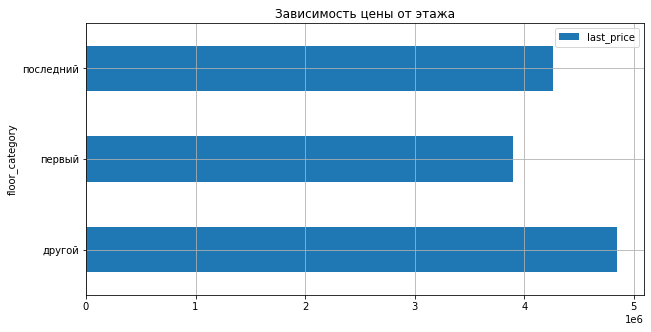

In [101]:
(
    data.pivot_table(index='floor_category', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(10, 5), kind='barh', title='Зависимость цены от этажа')
)

По данному графику хорошо видно, что средняя цена за не первый и не последний этаж выше. 

<AxesSubplot:title={'center':'Зависимость цены от дня недели'}, ylabel='day_week'>

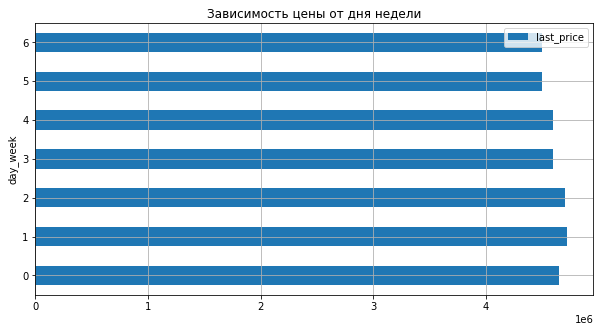

In [102]:
(
    data.pivot_table(index='day_week', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(10, 5), kind='barh', title='Зависимость цены от дня недели')
)

По данному графику видим, что стоимость почти не зависит от дня недели.

<AxesSubplot:title={'center':'Зависимость цены от месяца'}, xlabel='month'>

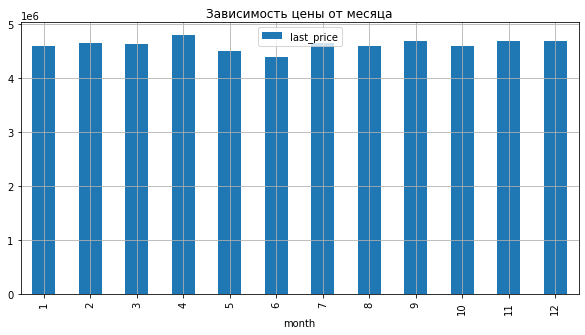

In [103]:
(
    data.pivot_table(index='month', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(10, 5), kind='bar', title='Зависимость цены от месяца')
)

По данному графику видим, что стоимость почти не зависит от месяца.

<AxesSubplot:title={'center':'Зависимость цены от года'}, xlabel='year'>

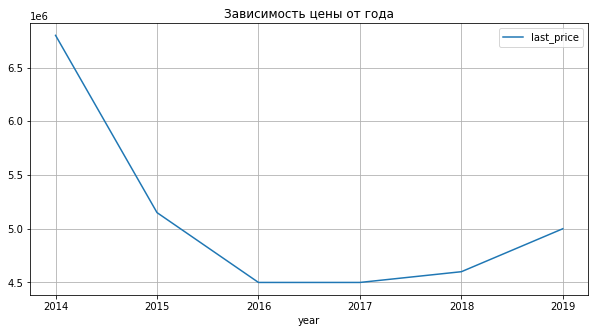

In [104]:
(
    data.pivot_table(index='year', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(10, 5), kind='line', title='Зависимость цены от года')
)

Средняя стоимость была самой высокой в 2014, однако заметен медленный рост цен с 2016 года. Резкое падение было в 2015 году, возможно, до этого не было возможности продавать квартиры в маленьких городах и поселках или стали активно их привлекать.

<AxesSubplot:title={'center':'Зависимость цены от количества комнат'}, ylabel='rooms'>

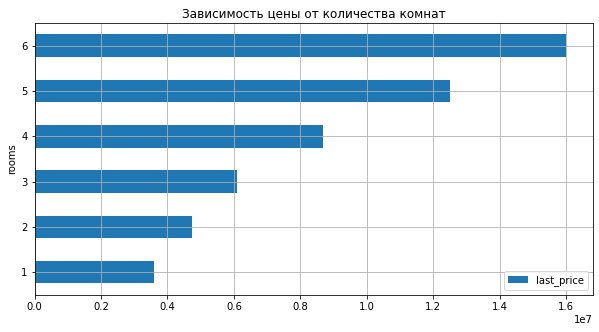

In [105]:
(
    data.pivot_table(index='rooms', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(10, 5), kind='barh', title='Зависимость цены от количества комнат')
)

<AxesSubplot:title={'center':'Зависимость цены за кв. м. от количества комнат'}, ylabel='rooms'>

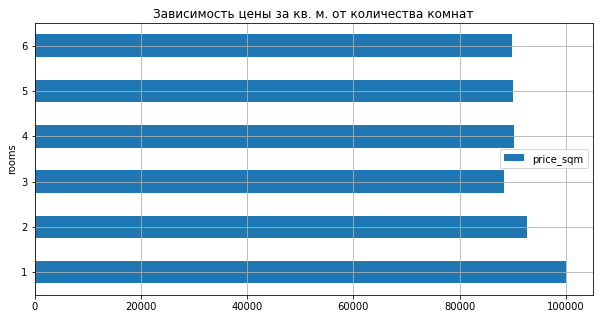

In [106]:
(
    data.pivot_table(index='rooms', values='price_sqm', aggfunc='median')
    .plot(grid=True, figsize=(10, 5), kind='barh', title='Зависимость цены за кв. м. от количества комнат')
)

Вполне логично, что цена за квартиру растет с увеличением комнат. При этом падает цена за квадратный метр. 

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

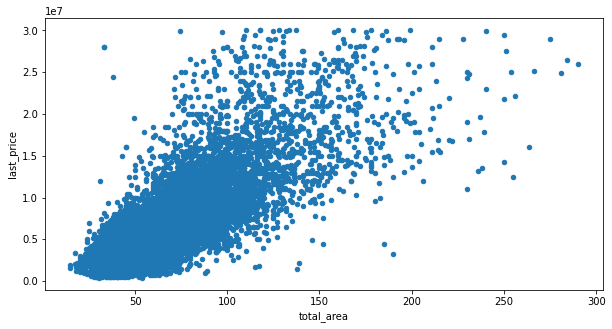

In [107]:
data.sort_values('total_area').plot(kind='scatter', x='total_area',y='last_price', figsize=(10, 5))


<AxesSubplot:xlabel='total_area', ylabel='price_sqm'>

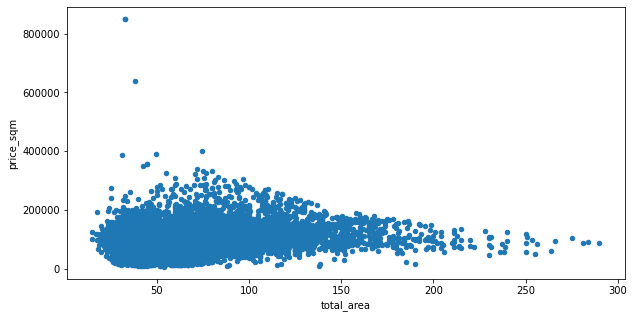

In [108]:
data.sort_values('total_area').plot.scatter(x='total_area',y='price_sqm', figsize=(10, 5))

По данным графикам можно пронаблюдать аналогичную закономерность — чем больше площадь, тем больше общая стоимость и тем меньше стоимость за квадратный метр, начиная с 50 кв. м.

<AxesSubplot:xlabel='living_area', ylabel='price_sqm'>

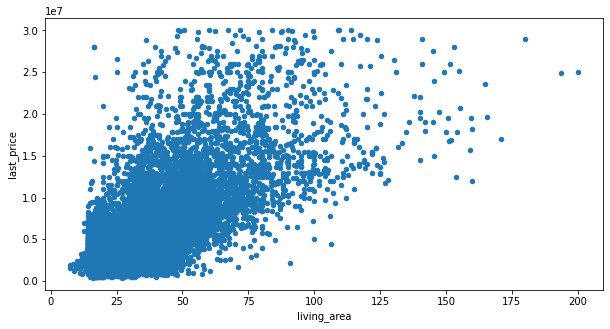

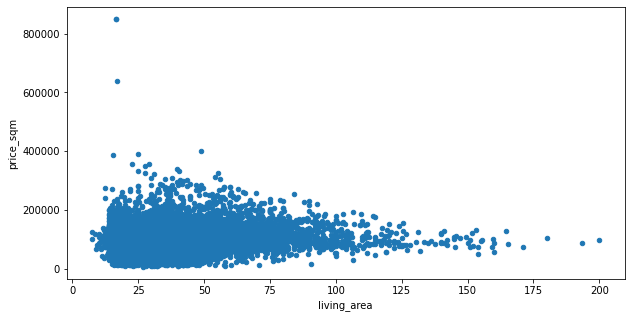

In [109]:
data.sort_values('living_area').plot(kind='scatter', x='living_area',y='last_price', figsize=(10, 5))
data.sort_values('living_area').plot.scatter(x='living_area',y='price_sqm', figsize=(10, 5))

<AxesSubplot:xlabel='kitchen_area', ylabel='price_sqm'>

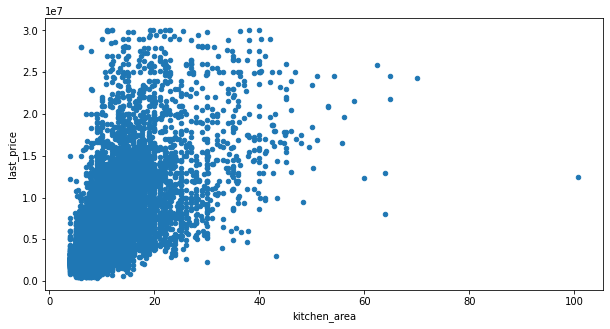

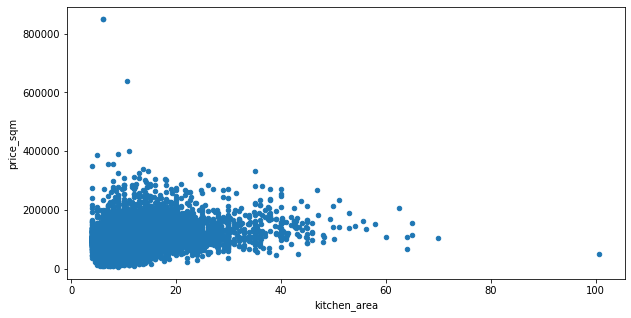

In [110]:
data.sort_values('kitchen_area').plot(kind='scatter', x='kitchen_area',y='last_price', figsize=(10, 5))
data.sort_values('kitchen_area').plot.scatter(x='kitchen_area',y='price_sqm', figsize=(10, 5))

Аналогичный вывод можно сделать и по жилой площади с площадью кухни.

<AxesSubplot:title={'center':'Изменение средней общей площади квартир по годам'}, xlabel='year'>

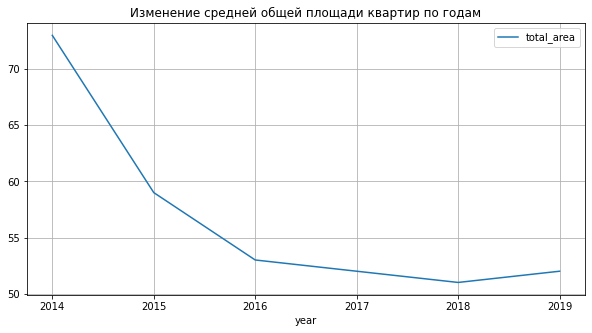

In [111]:
(
    data.pivot_table(index='year', values='total_area', aggfunc='median')
    .plot(grid=True, figsize=(10, 5), kind='line', title='Изменение средней общей площади квартир по годам')
)

Видно, что с 2014 года общая площадь квартир стала меньше. Это связано с тем, что количество объявлений стало больше.

<AxesSubplot:title={'center':'Изменение количества объявлений по годам'}, xlabel='year'>

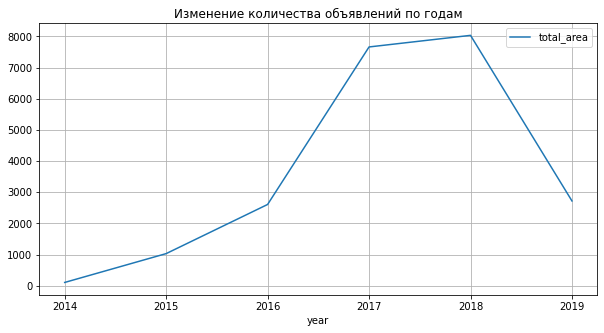

In [112]:
(
    data.pivot_table(index='year', values='total_area', aggfunc='count')
    .plot(grid=True, figsize=(10, 5), kind='line', title='Изменение количества объявлений по годам')
)

In [113]:
data.pivot_table(index='year', values='total_area', aggfunc='count')

,total_area
year,
2014,107
2015,1032
2016,2609
2017,7663
2018,8035
2019,2722


Благодаря данному графику и сводной таблице становится ясна причина резкого "падения" средней стоимости с 2014 по 2015, объявлений просто стало больше. Также похоже, что данные были за неполный 2019 год, поэтому рано делать по нему какие-либо выводы. 

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

<AxesSubplot:ylabel='locality_name'>

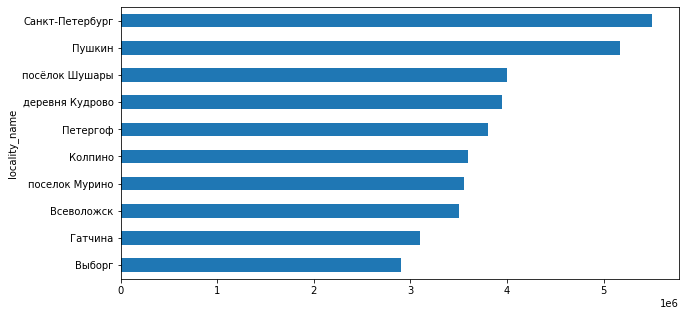

In [114]:
ten = data.pivot_table(index='locality_name', values='last_price' , aggfunc=['median','count'])
ten.columns=['price_sqm','count']
ten.sort_values(by=['count'], ascending=False, inplace=True)
ten = ten.iloc[:10]
ten.sort_values(by=['price_sqm'], ascending=True, inplace=True)
ten['price_sqm'].plot(kind='barh', figsize=(10, 5))

Самая дорогая недвижимость в Санкт-Петербурге, что логично.

Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра.

<AxesSubplot:xlabel='city_centers_nearest_km'>

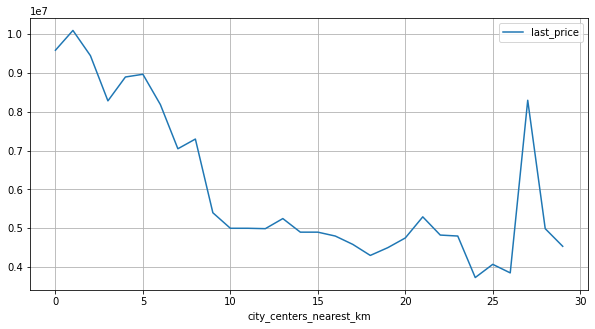

In [115]:
(
    data[data['locality_name']=='Санкт-Петербург']
    .pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='median')
    .plot(kind='line', figsize=(10, 5), grid=True)
)

Чем ближе недвижимость к центру, тем она дороже. Необычные пики скорее всего объясняются какими-то элитными районами. 

In [116]:
data[(data['locality_name']=='Санкт-Петербург') & (data['city_centers_nearest_km']== 27)]['last_price'].describe()

count    2.000000e+00
mean     8.300000e+06
std      8.555992e+06
min      2.250000e+06
25%      5.275000e+06
50%      8.300000e+06
75%      1.132500e+07
max      1.435000e+07
Name: last_price, dtype: float64

Среднее значение и медиана больше общего среднего, вероятно, здесь находится какой-то элитный район. 

<AxesSubplot:title={'center':'Количество других этажей'}, xlabel='city_centers_nearest_km'>

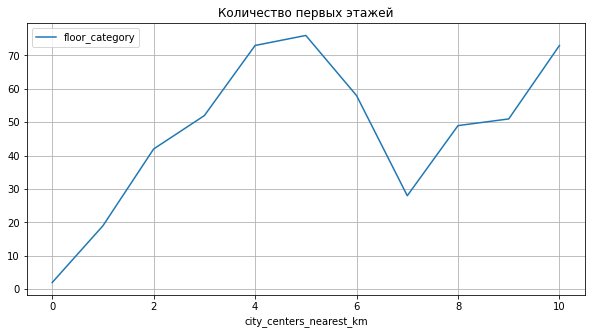

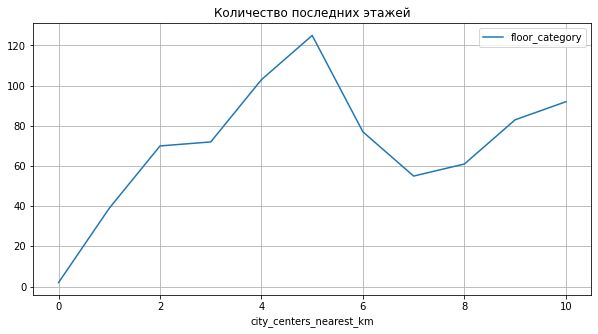

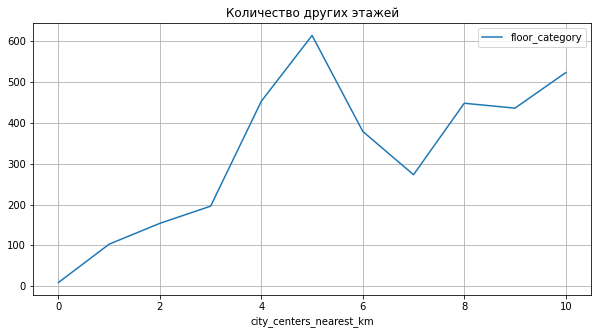

In [117]:
(
    data[(data['floor_category']== 'первый') & (data['city_centers_nearest_km']<=10)]
    .pivot_table(index='city_centers_nearest_km', values='floor_category', aggfunc='count')
    .plot(kind='line', figsize=(10, 5), grid=True, title='Количество первых этажей')
)
(
    data[(data['floor_category']== 'последний') & (data['city_centers_nearest_km']<=10)]
    .pivot_table(index='city_centers_nearest_km', values='floor_category', aggfunc='count')
    .plot(kind='line', figsize=(10, 5), grid=True, title='Количество последних этажей')
)
(
    data[(data['floor_category']== 'другой') & (data['city_centers_nearest_km']<=10)]
    .pivot_table(index='city_centers_nearest_km', values='floor_category', aggfunc='count')
    .plot(kind='line', figsize=(10, 5), grid=True, title='Количество других этажей')
)

### Общий вывод

После изучения данных удалось выяснить топ-10 населенных пунктов по цене и как меняется стоимость за квадратный метр в зависимости от удаленности к центру.  
Были выделены основные факторы, влияющие на стоимость квартиры (как общую, так и за квадратный метр), такие как площадь и количество комнат. 
Также убедились, что ни день, ни месяц почти никак не связаны с стоимостью квартиры. 
Заметно плавное увеличение цен на недвижимость за последние года.
Посчитали, за сколько в среднем удается продать квартиру, что можно считать быстрой и длительной продажей. 

In [118]:
# check
import seaborn as sns
import matplotlib.pyplot as plt

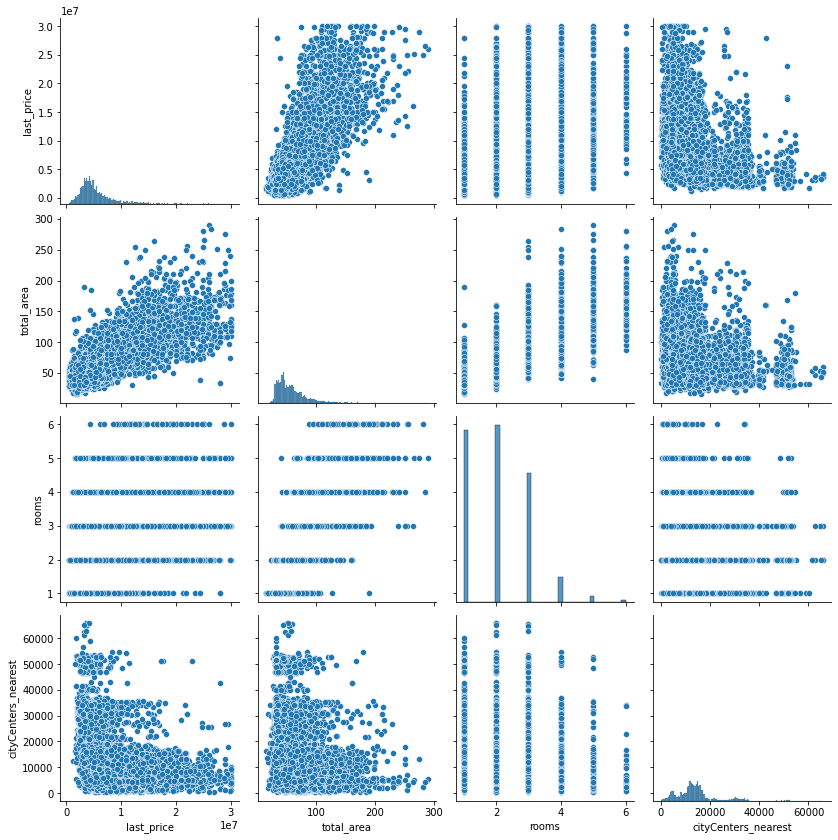

In [119]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']])
plt.gcf().set_size_inches(12,12);


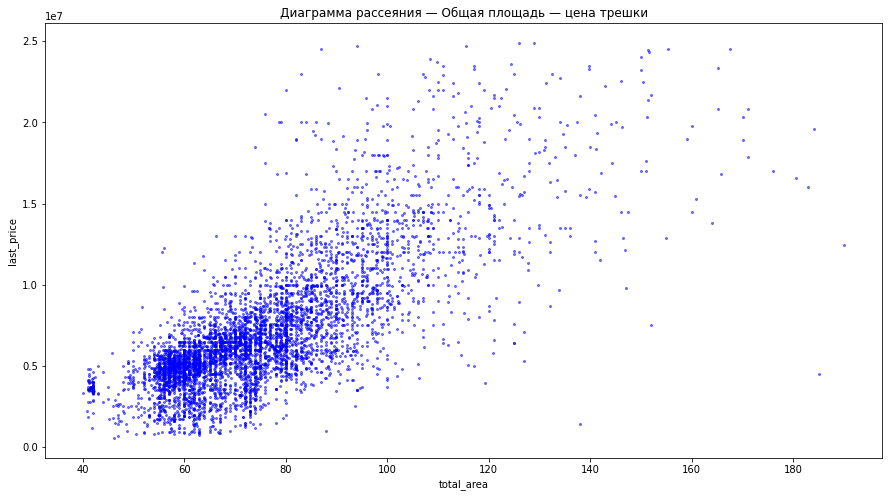

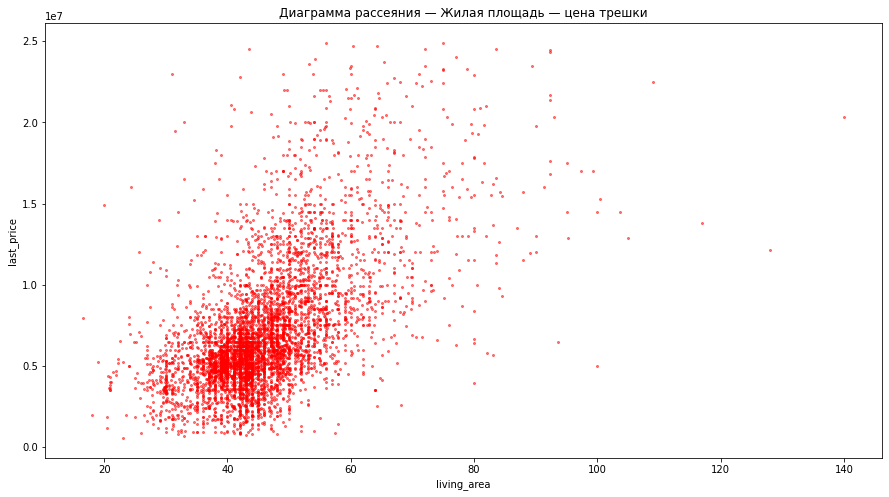

In [120]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод